In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("house_rental_data.csv (5).txt")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [11]:
df_scaled

array([[0.14886731, 0.04761905, 0.16216216, ..., 0.5       , 0.4       ,
        0.22919229],
       [0.32297735, 0.19047619, 0.16216216, ..., 0.5       , 0.4       ,
        0.29479295],
       [0.14174757, 0.19047619, 0.16216216, ..., 0.5       , 0.2       ,
        0.21279213],
       ...,
       [0.06925566, 0.57142857, 0.35135135, ..., 0.25      , 0.2       ,
        0.15949159],
       [0.24530744, 0.0952381 , 0.35135135, ..., 0.5       , 0.4       ,
        0.24149241],
       [0.18511327, 0.23809524, 0.16216216, ..., 0.5       , 0.2       ,
        0.12259123]])

In [12]:
from sklearn.cluster import KMeans

In [13]:
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [15]:
cluster_labels = kmeans.predict(df_scaled)
cluster_labels

array([0, 0, 1, 0, 3, 3, 0, 1, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 3, 0, 2, 3,
       1, 0, 2, 3, 2, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 2, 0, 2, 1, 0, 0,
       3, 0, 0, 3, 2, 1, 3, 0, 1, 1, 2, 0, 1, 3, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 1, 0, 1, 1, 0, 0, 0, 2, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 2, 2, 0, 2, 1, 3, 3,
       3, 0, 0, 3, 3, 0, 2, 1, 1, 0, 1, 3, 0, 0, 3, 1, 1, 3, 0, 1, 0, 0,
       3, 1, 3, 0, 1, 0, 0, 3, 2, 0, 1, 0, 0, 1, 3, 2, 0, 3, 3, 0, 0, 1,
       3, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 1, 3,
       0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 3, 0, 3, 3, 1,
       1, 0, 3, 3, 0, 1, 0, 0, 1, 0, 3, 0, 3, 1, 0, 1, 0, 0, 0, 3, 1, 3,
       1, 3, 3, 1, 3, 1, 1, 0, 3, 3, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 1, 3,
       2, 3, 3, 1, 2, 1, 2, 0, 3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0,
       0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1,
       2, 3, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 2, 2, 0,

In [16]:
df['cluster'] = cluster_labels

In [17]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,1177.698,2,7,2,2,2,62000,0
1,2134.800,5,7,4,2,2,78000,0
2,1138.560,5,7,2,2,1,58000,1
3,1458.780,2,7,3,2,2,45000,0
4,967.776,11,14,3,2,2,45000,3
...,...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000,3
641,377.148,4,10,1,1,1,24800,1
642,740.064,13,14,1,1,1,45000,1
643,1707.840,3,14,3,2,2,65000,0


In [18]:
df.groupby('cluster').describe()

Sqft                                                          \
         count         mean         std       min        25%       50%   
cluster                                                                  
0        269.0  1551.539309  431.916396   651.114  1245.3000  1487.244   
1        182.0   808.135187  273.246900   359.358   640.4400   754.296   
2         44.0  3368.051318  776.582547  2298.468  2881.0905  3202.200   
3        150.0  1817.995680  475.901732   889.500  1496.1390  1779.000   

                             Floor            ... Bathroom       Price  \
              75%       max  count      mean  ...      75%  max  count   
cluster                                       ...                        
0        1882.182  3558.000  269.0  3.631970  ...      2.0  3.0  269.0   
1         925.080  1839.486  182.0  6.054945  ...      1.0  2.0  182.0   
2        3664.740  5856.468   44.0  9.909091  ...      4.0  5.0   44.0   
3        2099.220  3148.830  150.0  8.773333  ...      2.0  3.0  150.0   

                                                                             \
                  mean           std      min       25%       50%       75%   
cluster                                                                       
0         55789.713755  20813.894170   6100.0   41000.0   50000.0   68000.0   
1         38037.340659  11813.776269  11900.0   29500.0   36000.0   45000.0   
2        156025.409091  35296.310224  80000.0  137250.0  150000.0  180000.0   
3         74574.360000  25285.373095  26000.0   55000.0   70000.0   95000.0   

                   
              max  
cluster            
0        150000.0  
1         85000.0  
2        250000.0  
3        150000.0  

[4 rows x 56 columns]

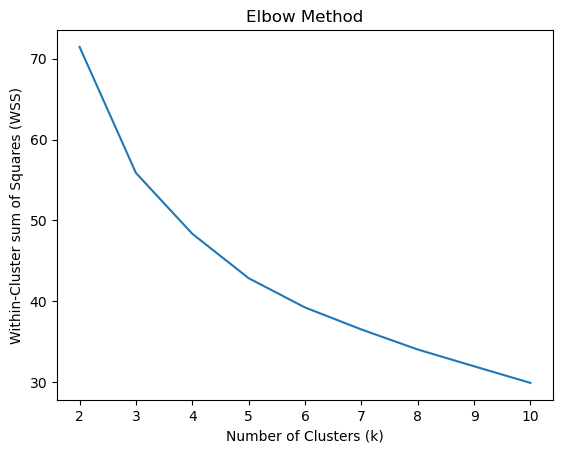

In [21]:
from sklearn.metrics import silhouette_score

wss_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wss_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster sum of Squares (WSS)')
plt.title("Elbow Method")
plt.show()

In [22]:
df.to_csv('house_with_clusters.csv', index=False)